In [160]:
import pandas as pd
import requests as rq
from zipfile import ZipFile
from matplotlib import pyplot as plt
import seaborn as sns

## Title, Gross

In [7]:
bom_df = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
# bom_df.head(1)


## Person/Name, known for titles

In [8]:
imdb_name_basics_df = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
imdb_name_basics_df.head(1)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"


## Title AKA

In [9]:
imdb_title_akas_df = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
imdb_title_akas_df.head(10)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
5,tt0369610,15,Jurassic World,GR,NaN,imdbDisplay,NaN,0.0
6,tt0369610,16,Jurassic World,IT,NaN,imdbDisplay,NaN,0.0
7,tt0369610,17,Jurski svijet,HR,NaN,imdbDisplay,NaN,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,NaN,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,NaN,imdbDisplay,NaN,0.0


## Title, Genre

In [10]:
imdb_title_basics_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_title_basics_df.head(1)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"


## Directors, Writers

In [11]:
imdb_title_crew_df = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
imdb_title_crew_df.head(1)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854


## Job (actor/actress, Director)

In [12]:
imdb_title_principals_df = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
imdb_title_principals_df.head(1)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"


## Avg Rating

In [169]:
imdb_title_ratings_df = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
imdb_title_ratings_df.head(1)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31


In [170]:
imdb_rating_genre_df = imdb_title_ratings_df.merge(imdb_title_basics_df, on='tconst')
imdb_highest_rated_genres_df = imdb_rating_genre_df.sort_values('averagerating' , ascending=False)
imdb_highest_rated_genres_df['averagerating'].value_counts()

7.0     2262
6.6     2251
7.2     2249
6.8     2239
6.5     2221
        ... 
9.6       18
10.0      16
9.8       15
9.7       12
9.9        5
Name: averagerating, Length: 91, dtype: int64

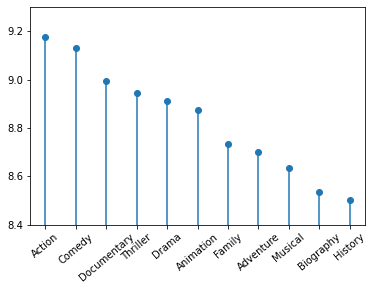

In [198]:
imdb_complete_df = imdb_title_ratings_df.merge(imdb_title_principals_df, on='tconst').merge(imdb_title_crew_df, on='tconst').merge(imdb_title_basics_df, on='tconst')
imdb_complete_df.head(10)
imdb_complete_df.dropna(subset=['genres'], axis=0, inplace=True)
imdb_low_ratings = imdb_complete_df[imdb_complete_df['averagerating'] < 8.5].index
imdb_complete_df.drop(imdb_low_ratings, inplace=True)
imdb_low_votes = imdb_complete_df[imdb_complete_df['numvotes'] < 300.0].index
imdb_complete_df.drop(imdb_low_votes, inplace=True)
# # imdb_complete_df['averagerating'].value_counts()
# # imdb_complete_df.info()
imdb_genre_ratings = imdb_complete_df.drop(['tconst','ordering','nconst','category','job','characters','directors','writers','primary_title','original_title','start_year','runtime_minutes'], axis=1)
imdb_genre_ratings.set_index('genres')
imdb_genre_ratings.sort_values(by='averagerating', ascending=False)
imdb_genre_ratings_with_comma = imdb_genre_ratings[imdb_genre_ratings['genres'].str.contains(',')].index
imdb_genre_ratings.drop(imdb_genre_ratings_with_comma, inplace=True)
# imdb_genre_ratings.groupby('genres').mean().sort_values(by='averagerating', ascending=False)
imdb_ratings_means = imdb_genre_ratings.groupby('genres').mean().sort_values(by='averagerating', ascending=False)
imdb_ratings_means
# imdb_genre_ratings.min()
fig, ax = plt.subplots()
ax.stem(imdb_ratings_means.index, imdb_ratings_means['averagerating'])
ax.set(ylim=(8.4, 9.3))
ax.tick_params(axis='x', labelrotation = 40)

In [16]:
imdb_1tconst_df = imdb_complete_df.drop_duplicates(subset='tconst')
imdb_1tconst_df = imdb_1tconst_df.rename({'primary_title':'movie'}, axis=1).set_index('movie')
imdb_1tconst_df.head(1)

,tconst,averagerating,numvotes,ordering,nconst,category,job,characters,directors,writers,original_title,start_year,runtime_minutes,genres
movie,,,,,,,,,,,,,,
Laiye Je Yaarian,tt10356526,8.3,31,10,nm8994524,production_designer,NaN,NaN,nm8353804,"nm3057599,nm4179342",Laiye Je Yaarian,2019,117.0,Romance


## Genre, Synopsis, Director

In [41]:
rt_movie_info_df = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', error_bad_lines=False, sep='\t')
rt_movie_info_df = rt_movie_info_df.rename({'rating':'rated'}, axis=1)
rt_movie_info_by_id_df = rt_movie_info_df.set_index('id')
rt_movie_info_by_id_df.head(1)
# rt_movie_info_df.info()

,synopsis,rated,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN


## RT Rating, Fresh/Rotten

In [83]:
rt_reviews_df = pd.read_csv('data/zippedData/rt.reviews.tsv.gz', error_bad_lines=False, encoding= 'unicode_escape', sep='\t')
rt_reviews_by_id_df = rt_reviews_df.set_index('id')
rt_reviews_by_id_df.head(1)
# rt_reviews_df['review'][0]

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
1765,"upposed to be a horror-comedy film, but it's n...",T,rotten,Jeff Vice,0,Deseret News (Salt Lake City),"January 1, 2000"
760,The times they are a-changin': a frat comedy w...,R,fresh,Jaymes Durante,0,NaN,"May 18, 2016"
1483,Often evoking the dark humour of a Beckett pla...,R,fresh,Isobel Yeap,0,NaN,"May 15, 2016"
667,The humour thrives primarily off of the kookin...,R,fresh,Isobel Yeap,0,NaN,"May 13, 2016"
251,What Carol captures more specifically than the...,R,fresh,Ian Barr,0,NaN,"March 2, 2016"
...,...,...,...,...,...,...,...
2000,"A lightweight, uneven action comedy that freel...",NaN,rotten,Daniel Eagan,0,Film Journal International,"October 5, 2002"
2000,"The funny thing is, I didn't mind all this con...",NaN,fresh,Andrew Sarris,1,Observer,"October 2, 2002"
2000,Despite Besson's high-profile name being Wasab...,NaN,fresh,Andy Klein,0,New Times,"September 26, 2002"


In [102]:
rt_complete_df = rt_movie_info_by_id_df.join(rt_reviews_by_id_df, on='id')
rt_complete_df.dropna(subset=['rating'], inplace=True)
rt_high_ratings_df = rt_complete_df[(rt_complete_df['rating'] == '5/5') | (rt_complete_df['rating'] == '9/10') | (rt_complete_df['rating'] == 'A+') | (rt_complete_df['rating'] == 'A')]
rt_high_ratings_df

'A+'

## Popularity, Vote Avg, Vote Count

In [12]:
tmdb_movies_df = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
tmdb_movies_df.head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [16]:
tmdb_pop_vote_df = tmdb_movies_df.drop(['Unnamed: 0', 'original_language', 'original_title', 'release_date'], axis=1).set_index('title')
tmdb_pop_vote_df.head(10)

,genre_ids,id,popularity,vote_average,vote_count
title,,,,,
Harry Potter and the Deathly Hallows: Part 1,"[12, 14, 10751]",12444,33.533,7.7,10788
How to Train Your Dragon,"[14, 12, 16, 10751]",10191,28.734,7.7,7610
Iron Man 2,"[12, 28, 878]",10138,28.515,6.8,12368
Toy Story,"[16, 35, 10751]",862,28.005,7.9,10174
Inception,"[28, 878, 12]",27205,27.920,8.3,22186
Percy Jackson & the Olympians: The Lightning Thief,"[12, 14, 10751]",32657,26.691,6.1,4229
Avatar,"[28, 12, 14, 878]",19995,26.526,7.4,18676
Toy Story 3,"[16, 10751, 35]",10193,24.445,7.7,8340
Despicable Me,"[16, 10751, 35]",20352,23.673,7.2,10057


## Budget , Gross

In [5]:
tn_movie_budgets_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
tn_movie_budgets_df.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


In [6]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [7]:
def drop_dollar_sign(value):
    value_list = list(value)
    value_list.remove('$')
    for char in value_list:
        if ',' == char:
            value_list.remove(char)
    value_float = float(''.join(value_list))
    value = value_float
    return value

def make_money(value):
    value = '${:,.2f}'.format(value)
    return value

tn_movie_budgets_df['prod_budg'] = tn_movie_budgets_df['production_budget'].map(drop_dollar_sign)
tn_movie_budgets_df['dom_prof'] = tn_movie_budgets_df['domestic_gross'].map(drop_dollar_sign) - tn_movie_budgets_df['production_budget'].map(drop_dollar_sign)
tn_movie_budgets_df['ww_prof'] = tn_movie_budgets_df['worldwide_gross'].map(drop_dollar_sign) - tn_movie_budgets_df['production_budget'].map(drop_dollar_sign)

In [10]:
tn_movie_budgets_sorted_df = tn_movie_budgets_df.drop(['id', 'release_date', 'domestic_gross', 'worldwide_gross'], axis=1)
tn_movie_profits_df = tn_movie_budgets_sorted_df.sort_values(by='dom_prof', ascending=False)
tn_movie_profits_df['Domestic Profit'] = tn_movie_budgets_df['dom_prof'].map(make_money)
tn_movie_profits_df['Worldwide Profit'] = tn_movie_budgets_df['ww_prof'].map(make_money)
tn_numbers_str_df = tn_movie_profits_df.set_index('movie').drop (['prod_budg', 'dom_prof', 'ww_prof'], axis=1)
tn_numbers_floats_df = tn_movie_profits_df.set_index('movie').drop (['production_budget','Domestic Profit', 'Worldwide Profit'], axis=1)
# tn_numbers_str_df.head(20)
# tn_numbers_floats_df.head(20)

,prod_budg,dom_prof,ww_prof
movie,,,
Star Wars Ep. VII: The Force Awakens,306000000.0,630662225.0,1.747311e+09
Black Panther,200000000.0,500059566.0,1.148258e+09
Titanic,200000000.0,459363944.0,2.008208e+09
Star Wars Ep. IV: A New Hope,11000000.0,449998007.0,7.755980e+08
Jurassic World,215000000.0,437270625.0,1.433855e+09
ET: The Extra-Terrestrial,10500000.0,424610554.0,7.824653e+08
Incredibles 2,200000000.0,408581744.0,1.042521e+09
The Avengers,225000000.0,398279547.0,1.292936e+09
Avengers: Infinity War,300000000.0,378815482.0,1.748134e+09


array([[<AxesSubplot:title={'center':'dom_prof'}>]], dtype=object)

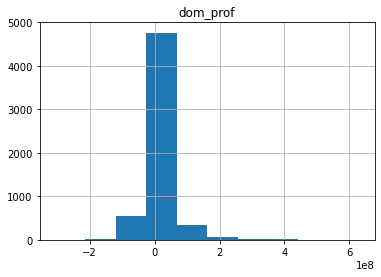

In [152]:
tn_numbers_floats_df.hist(column='dom_prof')

In [126]:
imdb_tn_combined_df = imdb_1tconst_df.merge(tn_numbers_floats_df, on='movie', how='right')
imdb_tn_combined_df.head(10)

,tconst,averagerating,numvotes,ordering,nconst,category,job,characters,directors,writers,original_title,start_year,runtime_minutes,genres,prod_budg,dom_prof,ww_prof
movie,,,,,,,,,,,,,,,,,
Star Wars Ep. VII: The Force Awakens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306000000.0,630662225.0,1.747311e+09
Black Panther,tt1825683,7.3,516148.0,10.0,nm3234869,composer,NaN,NaN,nm3363032,"nm3363032,nm1963288,nm0498278,nm0456158",Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi",200000000.0,500059566.0,1.148258e+09
Titanic,tt2495766,6.2,20.0,10.0,nm5409363,actor,NaN,"[""First Officer Murdock""]","nm4430776,nm5410036",nm5410036,Titanic,2012.0,NaN,Adventure,200000000.0,459363944.0,2.008208e+09
Star Wars Ep. IV: A New Hope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11000000.0,449998007.0,7.755980e+08
Jurassic World,tt0369610,7.0,539338.0,10.0,nm0189777,producer,producer,NaN,nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",215000000.0,437270625.0,1.433855e+09
ET: The Extra-Terrestrial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10500000.0,424610554.0,7.824653e+08
Incredibles 2,tt3606756,7.7,203510.0,10.0,nm1733986,cinematographer,director of photography: lighting,NaN,nm0083348,nm0083348,Incredibles 2,2018.0,118.0,"Action,Adventure,Animation",200000000.0,408581744.0,1.042521e+09
The Avengers,tt0848228,8.1,1183655.0,10.0,nm0285701,editor,NaN,NaN,nm0923736,"nm0923736,nm0672015",The Avengers,2012.0,143.0,"Action,Adventure,Sci-Fi",225000000.0,398279547.0,1.292936e+09
The Avengers,tt0848228,8.1,1183655.0,10.0,nm0285701,editor,NaN,NaN,nm0923736,"nm0923736,nm0672015",The Avengers,2012.0,143.0,"Action,Adventure,Sci-Fi",60000000.0,-36614584.0,-1.141458e+07


In [145]:
imdb_tn_filtered_df = imdb_tn_combined_df.loc[:, ['averagerating', 'dom_prof', 'ww_prof']]
imdb_tn_filtered_df.dropna(subset=['averagerating'], inplace=True)
imdb_tn_filtered_df.drop(imdb_tn_filtered_df[imdb_tn_filtered_df['dom_prof'] < 0].index, inplace=True)
imdb_tn_filtered_df.sort_values(['averagerating', 'dom_prof'], ascending=False)

,averagerating,dom_prof,ww_prof
movie,,,
Traffic,9.2,76107476.0,160300000.0
Frailty,9.0,2110448.0,8947280.0
Inception,8.8,132576195.0,675524642.0
Message in a Bottle,8.8,22880016.0,22880016.0
Serendipity,8.8,22255310.0,49477297.0
...,...,...,...
The Howling,2.6,16985000.0,16985000.0
Tooth Fairy,2.6,12022256.0,64610386.0
Ghost,2.3,195631306.0,495600000.0


<AxesSubplot:xlabel='averagerating', ylabel='dom_prof'>

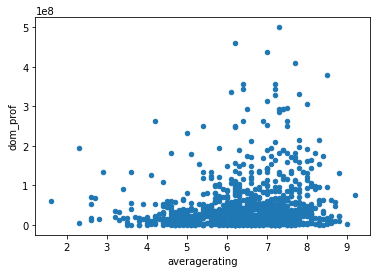

In [150]:
imdb_tn_filtered_df.plot(x='averagerating', y='dom_prof', kind='scatter')